In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(6555)
import time

In [2]:
#################################################
N_test = 100

x_test = np.random.uniform(0,1,N_test).reshape(N_test,1)   #Predictors

e = 0.3 * np.random.randn(N_test,1)

t_test = np.sin(2*np.pi*x_test) + e       #Targets


In [3]:
def designMatrix(x,M):
    
    if M == 0:
        return x
    
    else:
        X = np.hstack((np.ones([len(x),1]), x))
    
        for i in range(2, M+1):
            X = np.hstack((X,(x)**i))
        
        return X

In [4]:
def cost(w,x,t):
    return np.sum(np.power(x@w-t,2))

In [5]:
def closedForm(x,t):
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),t)

In [6]:
def gradientDescent(x,t,M,rho,epochs,plot):
    
    m = 2/len(t)
    
    X = designMatrix(x,M)
    x2 = designMatrix(np.linspace(0,1,len(t)).reshape(len(t),1),M)
    
    weights = np.random.randn(M+1,1) #Random initial
    
    start = time.time()
    for i in range(epochs):
        #gradient = m * X.T@(X@weights-t)
        gradient = m * np.dot(X.T,np.dot(X,weights)-t_train)
        weights = weights - rho * gradient
    end = time.time()
    
    print("M = " + str(M) + " Model trained in: " + "{:.2f}".format(end - start) + "s")
    error = cost(weights,X,t)
    print("Training Error: " + str(error))
    
    if plot:
        y3 = x2@weights

        plt.plot(np.linspace(0,1,len(y3)),y3,color = 'red')
        plt.scatter(x,t)
        plt.title("M = " + str(M))
        plt.xlabel('Predictor')
        plt.ylabel('Target')
        plt.show()
    
    return weights

In [7]:
####### N = 10 Train #######
np.random.seed(6555)
N_train = 10

x_train = np.random.uniform(0,1,N_train).reshape(N_train,1)  #Predictors

e = 0.3 * np.random.randn(N_train,1)

t_train = np.sin(2*np.pi*x_train) + e   #Targets

error_train = np.zeros((10,1))
error_test = np.zeros((10,1))
M = 9
for i in range(M+1):
    weights_train = closedForm(designMatrix(x_train,i),t_train)
    #weights_train = gradientDescent(x_train,t_train,M=i,rho=1e-1,epochs=700000,plot=False)
    error_train[i] = cost(weights_train,designMatrix(x_train,i),t_train)
    error_test[i] = cost(weights_train,designMatrix(x_test,i),t_test)
    
error_test = np.sqrt(error_test/N_test)
error_train = np.sqrt(error_train/N_train)


Text(0, 0.5, 'Error')

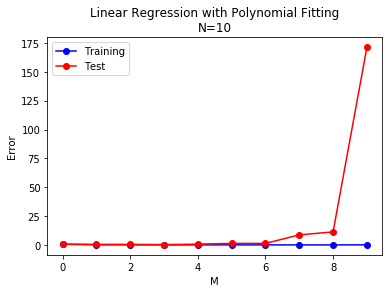

In [8]:
plt.figure(1)      ##Plot N = 10 Error
m = np.linspace(0,9,M+1)
plt.plot(m,error_train,'-o', color = 'blue', label = 'Training')
plt.plot(m,error_test,'-o', color = 'red', label = "Test")
plt.legend()
plt.title("Linear Regression with Polynomial Fitting\nN=10")
plt.xlabel('M')
plt.ylabel('Error')

In [9]:
####### N = 100 Train #######
N_train = 100

x_train = np.random.uniform(0,1,N_train).reshape(N_train,1)

e = 0.3 * np.random.randn(N_train,1)

t_train = np.sin(2*np.pi*x_train) + e

error_train = np.zeros((10,1))
error_test = np.zeros((10,1))
M = 9

for i in range(M+1):
#     weights_train = closedForm(X_train,t_train)
    weights_train = gradientDescent(x_train,t_train,M=i,rho=1e-1,epochs=700000,plot=False)
    error_train[i] = cost(weights_train,designMatrix(x_train,i),t_train)
    error_test[i] = cost(weights_train,designMatrix(x_test,i),t_test)
    
error_test = np.sqrt(error_test/N_test)
error_train = np.sqrt(error_train/N_train)

M = 0 Model trained in: 2.62s
Training Error: 50.06604167286198
M = 1 Model trained in: 2.97s
Training Error: 27.473840537726876
M = 2 Model trained in: 3.15s
Training Error: 27.46848240670222
M = 3 Model trained in: 2.85s
Training Error: 9.354654540860826
M = 4 Model trained in: 3.08s
Training Error: 9.161686561922
M = 5 Model trained in: 3.13s
Training Error: 9.148443871958662
M = 6 Model trained in: 3.28s
Training Error: 8.979653678042558
M = 7 Model trained in: 3.09s
Training Error: 8.869953967718034
M = 8 Model trained in: 3.25s
Training Error: 8.796255805013702
M = 9 Model trained in: 3.35s
Training Error: 8.793264342616846


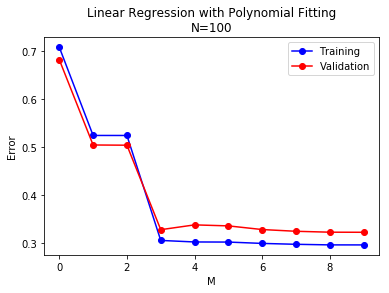

In [10]:
plt.figure(2)            ##Plot N = 100 Error
m = np.linspace(0,9,M+1)
plt.plot(m,error_train,'-o', color = 'blue', label = 'Training')
plt.plot(m,error_test,'-o', color = 'red', label = "Validation")
plt.legend()
plt.title("Linear Regression with Polynomial Fitting\nN=100")
plt.xlabel('M')
plt.ylabel('Error')
plt.show()